# Simple Linear Regression

In [19]:
#Import Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [26]:
#Import data
dataset = pd.read_csv('data/test.csv')
x = dataset.iloc[:,:-1].values
y = dataset.iloc[:,1].values

In [7]:
#Splitting training set and testing set
from sklearn.cross_validation import train_test_split
xtrain, xtest, ytrain, ytest =train_test_split(x,y,test_size=0.25)

ModuleNotFoundError: No module named 'sklearn.cross_validation'

In [28]:
#Training and Fitting model
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(xtrain, ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [29]:
#Predicting using the Model
y_prediction = regressor.predict(xtest)

In [30]:
xtest

array([[ 4.61],
       [ 4.69],
       [ 4.21],
       [ 2.46],
       [ 2.03],
       [ 5.58],
       [ 5.63],
       [10.63],
       [ 7.11]])

In [31]:
ytest

array([ 66854.51,  57252.44,  64194.7 ,  44312.45,  55577.37,  68822.94,
        71015.5 , 130468.08, 101400.67])

In [32]:
y_prediction

array([ 70098.70924642,  70872.09151126,  66231.79792218,  49314.06087863,
        45157.13120507,  79475.9692077 ,  79959.33312323, 128295.72467621,
        94266.90502291])

<function matplotlib.pyplot.show>

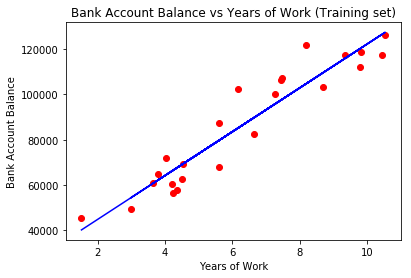

In [33]:

#Visualising the Training set Results
plt.scatter(xtrain, ytrain,color='red')
plt.plot(xtrain,regressor.predict(xtrain), color='blue')
plt.title('Bank Account Balance vs Years of Work (Training set)')
plt.xlabel('Years of Work')
plt.ylabel('Bank Account Balance')
plt.show

<function matplotlib.pyplot.show>

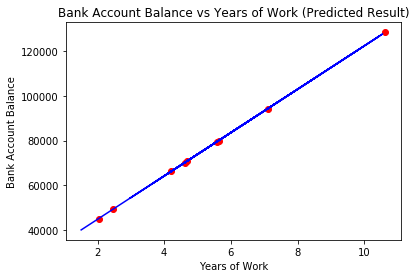

In [34]:
#Visualise Predicted result
plt.scatter(xtest, y_prediction,color='red')
plt.plot(xtrain,regressor.predict(xtrain), color='blue')
plt.title('Bank Account Balance vs Years of Work (Predicted Result)')
plt.xlabel('Years of Work')
plt.ylabel('Bank Account Balance')
plt.show

# Polynomial Regression

In [35]:
# Training Polynomial Regression Model
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(xtrain)
poly_reg.fit(X_poly, ytrain)
lin_reg = LinearRegression()
lin_reg.fit(X_poly, ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [41]:
# Predict Result with Polynomial Regression
lin_reg.predict(poly_reg.fit_transform(xtest[:]))

array([ 68448.02833806,  69486.10558117,  63387.07441633,  47265.84683436,
        45964.34229093,  81214.76584581,  81868.83579128, 120676.94819689,
        99652.96375252])

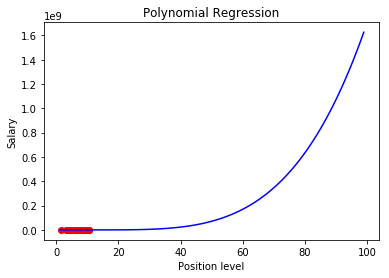

In [43]:
plt.scatter(xtrain, ytrain, color = 'red')
plt.plot(X, lin_reg.predict(poly_reg.fit_transform(X)), color = 'blue')
plt.title('Polynomial Regression')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

ValueError: x and y must be the same size

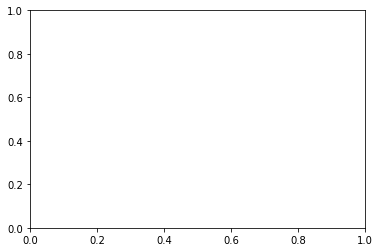

In [47]:
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, lin_reg.predict(poly_reg.fit_transform(X_grid)), color = 'blue')
plt.title('Polynomial Regression')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

# scikit learn test

[0.0202184  0.07103606 0.0871293  0.11827443 0.14335329 0.38344152
 0.41466194 0.4236548  0.43758721 0.46147936 0.52184832 0.52889492
 0.54488318 0.5488135  0.56804456 0.60276338 0.63992102 0.64589411
 0.71518937 0.77815675 0.78052918 0.79172504 0.79915856 0.83261985
 0.87001215 0.891773   0.92559664 0.94466892 0.96366276 0.97861834]
[ 1.0819082   0.87027612  1.14386208  0.70322051  0.78494746 -0.25265944
 -0.22066063 -0.26595867 -0.4562644  -0.53001927 -0.86481449 -0.99462675
 -0.87458603 -0.83407054 -0.77090649 -0.83476183 -1.03080067 -1.02544303
 -1.0788268  -1.00713288 -1.03009698 -0.63623922 -0.86230652 -0.75328767
 -0.70023795 -0.41043495 -0.50486767 -0.27907117 -0.25994628 -0.06189804]


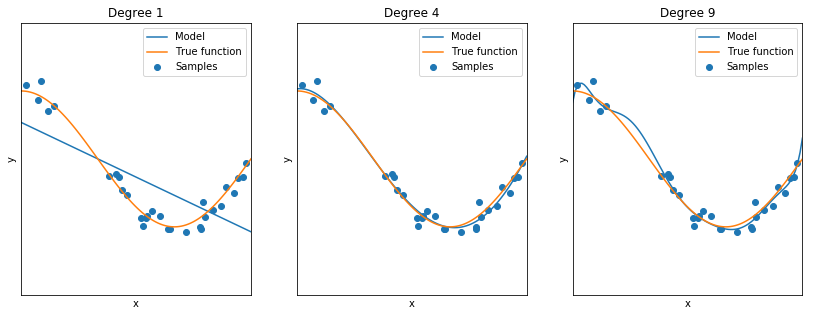

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

np.random.seed(0)

n_samples = 30
degrees = [1, 4, 9]

true_fun = lambda X: np.cos(1.5 * np.pi * X)
X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1

print(X)
print(y)

plt.figure(figsize=(14, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i],
                                             include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X[:, np.newaxis], y)

    X_test = np.linspace(0, 1, 100)
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    plt.plot(X_test, true_fun(X_test), label="True function")
    plt.scatter(X, y, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title("Degree {}".format(degrees[i]))
plt.show()




In [ ]:
>>> from sklearn.preprocessing import PolynomialFeatures
>>> import numpy as np
>>> X = np.arange(6).reshape(3, 2)
>>> X
array([[0, 1],
       [2, 3],
       [4, 5]])
>>> poly = PolynomialFeatures(degree=2)
>>> poly.fit_transform(X)
array([[ 1.,  0.,  1.,  0.,  0.,  1.],
       [ 1.,  2.,  3.,  4.,  6.,  9.],
       [ 1.,  4.,  5., 16., 20., 25.]])

In [ ]:
>>> from sklearn.preprocessing import PolynomialFeatures
>>> from sklearn.linear_model import LinearRegression
>>> from sklearn.pipeline import Pipeline
>>> import numpy as np
>>> model = Pipeline([('poly', PolynomialFeatures(degree=3)),
...                   ('linear', LinearRegression(fit_intercept=False))])
>>> # fit to an order-3 polynomial data
>>> x = np.arange(5)
>>> y = 3 - 2 * x + x ** 2 - x ** 3
>>> model = model.fit(x[:, np.newaxis], y)
>>> model.named_steps['linear'].coef_
array([ 3., -2.,  1., -1.])